# Import Libraries

In [812]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
#from sklearn.preprocessing import LabelBinarizer

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(tf.__version__)

2.9.1


# Import Dataset from csv file

In [813]:
df = pd.read_csv(r'Dataset\dataset-song-genre.csv')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,3txHZTpGeVASXa5ARwoRX6,Frejat,Frejat Ao Vivo No Rock In Rio,Puro Êxtase - Ao Vivo,45,292186,False,0.571,0.924,9,-4.727,1,0.1970,0.179000,0.000004,0.7190,0.5000,121.056,4,r-n-b
1,2e7LBdeiidf0ZC5Qj52u0G,STU48,無謀な夢は覚めることがない【劇場盤】,奇跡という名のストーリー,19,242099,False,0.368,0.826,6,-3.448,1,0.0421,0.057200,0.000000,0.2030,0.6630,83.102,4,j-idol
2,0hlh787aY52rcNvJHnE0Ml,Mike NRG;Weapon X,Lost in Dreams (Q-Base OST 2008),Lost In Dreams - Weapon X Remix,23,296360,False,0.547,0.867,6,-5.040,1,0.0326,0.054600,0.489000,0.0735,0.2530,163.002,4,hardstyle
3,3s067jTdOv8wnuUHeXdtjT,NICO Touches the Walls,オーロラ,ホログラム,56,248906,False,0.388,0.894,0,-3.425,1,0.0455,0.000808,0.000000,0.1990,0.7240,156.120,4,anime
4,4oE62AqzUuiwV09HGxiMlu,Edvard Grieg;Una Bourne,"Mozart, Liszt & Others: Piano Works","Lyric Pieces I, Op. 12 (Excerpts): No. 6, Norsk",0,42306,False,0.345,0.236,2,-21.922,1,0.0401,0.989000,0.952000,0.2280,0.3800,135.677,4,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91195,0Y1hw2GXV8npQI7C21ZIT1,Surfaces,Hidden Gems,Wave of You,0,213842,False,0.695,0.656,1,-6.038,1,0.0489,0.057000,0.000000,0.2670,0.3460,90.986,4,soul
91196,43QSsuxazI8xms29SYCtxh,KANA-BOON;もっさ,ないものねだり - Revenge THE FIRST TAKE,ないものねだり - Revenge THE FIRST TAKE,58,256256,False,0.565,0.811,1,-3.745,0,0.0570,0.014100,0.000000,0.0726,0.6910,87.508,4,j-pop
91197,7nbj09isjVmgNYJ7eKBzyt,Zach Bryan,Your Perfect Soundtrack,Something in the Orange,0,228013,False,0.369,0.192,4,-12.151,0,0.0400,0.555000,0.000008,0.0954,0.1480,175.212,3,country
91198,5bVUUTXB0Dg7EzuSZC57ek,Joey Montana;Sebastian Yatra,Regageton Para Niños,Suena El Dembow,1,195760,False,0.690,0.858,0,-4.431,1,0.0529,0.189000,0.000000,0.1130,0.7550,91.884,4,reggaeton


In [814]:
df.shape

(91200, 20)

# We are verifying faulty data and removing it from the dataframe.

In [815]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [816]:
df = df.dropna()

In [817]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# We convert Boolean data to numerical data

In [818]:
df = df.astype({'explicit':'int'})

In [819]:
df['explicit']

0        0
1        0
2        0
3        0
4        0
        ..
91195    0
91196    0
91197    0
91198    0
91199    0
Name: explicit, Length: 91199, dtype: int32

### Create Labels Dictionary

In [820]:
label_dict = dict(enumerate(set(df.track_genre.transpose())))
label_dict

{0: 'rock',
 1: 'black-metal',
 2: 'punk',
 3: 'power-pop',
 4: 'trip-hop',
 5: 'rock-n-roll',
 6: 'indie',
 7: 'blues',
 8: 'death-metal',
 9: 'latino',
 10: 'german',
 11: 'world-music',
 12: 'alternative',
 13: 'dancehall',
 14: 'garage',
 15: 'synth-pop',
 16: 'grindcore',
 17: 'samba',
 18: 'mpb',
 19: 'electro',
 20: 'j-dance',
 21: 'reggaeton',
 22: 'emo',
 23: 'j-pop',
 24: 'swedish',
 25: 'spanish',
 26: 'indian',
 27: 'children',
 28: 'j-rock',
 29: 'electronic',
 30: 'forro',
 31: 'dance',
 32: 'hard-rock',
 33: 'singer-songwriter',
 34: 'hardcore',
 35: 'pop-film',
 36: 'indie-pop',
 37: 'romance',
 38: 'sertanejo',
 39: 'honky-tonk',
 40: 'folk',
 41: 'edm',
 42: 'salsa',
 43: 'techno',
 44: 'tango',
 45: 'k-pop',
 46: 'songwriter',
 47: 'piano',
 48: 'brazil',
 49: 'dub',
 50: 'acoustic',
 51: 'disney',
 52: 'funk',
 53: 'country',
 54: 'metal',
 55: 'soul',
 56: 'turkish',
 57: 'groove',
 58: 'happy',
 59: 'study',
 60: 'disco',
 61: 'psych-rock',
 62: 'kids',
 63: 'come

### We create Inverted Dictionary

In [821]:
inv_label_dict = {v: k for k, v in label_dict.items()}
inv_label_dict

{'rock': 0,
 'black-metal': 1,
 'punk': 2,
 'power-pop': 3,
 'trip-hop': 4,
 'rock-n-roll': 5,
 'indie': 6,
 'blues': 7,
 'death-metal': 8,
 'latino': 9,
 'german': 10,
 'world-music': 11,
 'alternative': 12,
 'dancehall': 13,
 'garage': 14,
 'synth-pop': 15,
 'grindcore': 16,
 'samba': 17,
 'mpb': 18,
 'electro': 19,
 'j-dance': 20,
 'reggaeton': 21,
 'emo': 22,
 'j-pop': 23,
 'swedish': 24,
 'spanish': 25,
 'indian': 26,
 'children': 27,
 'j-rock': 28,
 'electronic': 29,
 'forro': 30,
 'dance': 31,
 'hard-rock': 32,
 'singer-songwriter': 33,
 'hardcore': 34,
 'pop-film': 35,
 'indie-pop': 36,
 'romance': 37,
 'sertanejo': 38,
 'honky-tonk': 39,
 'folk': 40,
 'edm': 41,
 'salsa': 42,
 'techno': 43,
 'tango': 44,
 'k-pop': 45,
 'songwriter': 46,
 'piano': 47,
 'brazil': 48,
 'dub': 49,
 'acoustic': 50,
 'disney': 51,
 'funk': 52,
 'country': 53,
 'metal': 54,
 'soul': 55,
 'turkish': 56,
 'groove': 57,
 'happy': 58,
 'study': 59,
 'disco': 60,
 'psych-rock': 61,
 'kids': 62,
 'comedy':

In [822]:
train_labels_num = []
for label in df.track_genre.transpose():
    train_labels_num.append(inv_label_dict[label])

train_labels_num

[64,
 84,
 100,
 108,
 70,
 30,
 89,
 18,
 30,
 37,
 83,
 25,
 54,
 27,
 5,
 12,
 1,
 67,
 42,
 17,
 31,
 98,
 12,
 86,
 86,
 19,
 46,
 6,
 28,
 72,
 23,
 6,
 35,
 45,
 27,
 38,
 62,
 76,
 77,
 43,
 109,
 28,
 47,
 42,
 91,
 15,
 58,
 8,
 10,
 60,
 31,
 26,
 49,
 54,
 101,
 15,
 39,
 57,
 2,
 50,
 73,
 74,
 74,
 95,
 31,
 40,
 94,
 69,
 2,
 1,
 68,
 98,
 2,
 60,
 28,
 108,
 90,
 11,
 12,
 35,
 40,
 0,
 55,
 35,
 1,
 88,
 65,
 6,
 48,
 18,
 29,
 19,
 66,
 107,
 13,
 108,
 30,
 61,
 21,
 47,
 76,
 83,
 41,
 80,
 31,
 30,
 39,
 107,
 78,
 105,
 75,
 95,
 91,
 30,
 106,
 23,
 103,
 71,
 17,
 96,
 0,
 70,
 36,
 79,
 110,
 48,
 52,
 57,
 63,
 68,
 94,
 70,
 64,
 20,
 93,
 104,
 18,
 87,
 50,
 100,
 33,
 15,
 73,
 105,
 82,
 81,
 17,
 45,
 80,
 21,
 108,
 5,
 28,
 65,
 26,
 99,
 38,
 58,
 109,
 18,
 58,
 58,
 25,
 9,
 9,
 69,
 104,
 91,
 31,
 33,
 14,
 78,
 76,
 101,
 102,
 37,
 105,
 82,
 1,
 45,
 54,
 70,
 60,
 25,
 74,
 96,
 20,
 19,
 101,
 19,
 41,
 4,
 60,
 6,
 5,
 24,
 93,
 7,
 93,
 53,

In [823]:
df['track_genre_num'] = train_labels_num

In [824]:
df[0:20]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,3txHZTpGeVASXa5ARwoRX6,Frejat,Frejat Ao Vivo No Rock In Rio,Puro Êxtase - Ao Vivo,45,292186,0,0.571,0.924,9,...,1,0.1970,0.179000,0.000004,0.7190,0.500,121.056,4,r-n-b,64
1,2e7LBdeiidf0ZC5Qj52u0G,STU48,無謀な夢は覚めることがない【劇場盤】,奇跡という名のストーリー,19,242099,0,0.368,0.826,6,...,1,0.0421,0.057200,0.000000,0.2030,0.663,83.102,4,j-idol,84
2,0hlh787aY52rcNvJHnE0Ml,Mike NRG;Weapon X,Lost in Dreams (Q-Base OST 2008),Lost In Dreams - Weapon X Remix,23,296360,0,0.547,0.867,6,...,1,0.0326,0.054600,0.489000,0.0735,0.253,163.002,4,hardstyle,100
3,3s067jTdOv8wnuUHeXdtjT,NICO Touches the Walls,オーロラ,ホログラム,56,248906,0,0.388,0.894,0,...,1,0.0455,0.000808,0.000000,0.1990,0.724,156.120,4,anime,108
4,4oE62AqzUuiwV09HGxiMlu,Edvard Grieg;Una Bourne,"Mozart, Liszt & Others: Piano Works","Lyric Pieces I, Op. 12 (Excerpts): No. 6, Norsk",0,42306,0,0.345,0.236,2,...,1,0.0401,0.989000,0.952000,0.2280,0.380,135.677,4,classical,70
5,2e3JPNqIsGJHeTFGD1OoVE,Kevi Jonny;Priscila Senna,Até o Último Gole,Se Mandar um Vem - Saudade Indignada,53,150937,0,0.754,0.464,1,...,1,0.0572,0.744000,0.000000,0.3310,0.731,131.842,4,forro,30
6,4vBPe99GPe7xmU66muo0PM,Ivory;Young Earth Sauce,BENZEMA,BENZEMA,28,135730,1,0.780,0.752,1,...,1,0.2900,0.543000,0.000552,0.1250,0.697,144.854,4,goth,89
7,6TI4299mWjx2h9yE7Cikm7,Kid Abelha,Educação Sentimental,Lágrimas e chuva,43,273466,0,0.708,0.816,9,...,0,0.0531,0.029400,0.017500,0.0503,0.749,122.415,4,mpb,18
8,6LnbaR5hLhhJkmmwYuMfCD,Cavalo De Pau,"Forró Cavalo de Pau, Vol. I (Ao Vivo)",Passos na Areia / Juras de Amor - Ao Vivo,38,219773,0,0.630,0.975,9,...,0,0.0526,0.093000,0.000418,0.3650,0.631,111.205,4,forro,30
9,3EyMnebawYAw9rdRM0xkpZ,Rashid Beibutov,Qalalıyam Qalalı (Azərbaycan Xalq Mahnıları),Yar Bizə Qonaq Gələcək,7,168466,0,0.405,0.273,4,...,1,0.0425,0.993000,0.000021,0.1540,0.704,175.822,3,romance,37


In [825]:
# dividing dataset to data to train and data to test
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [826]:
train_dataset.shape

(72959, 21)

In [827]:
test_dataset.shape

(18240, 21)

In [828]:
#know the column labels from dataset
train_dataset.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'track_genre_num'],
      dtype='object')

In [829]:
#sns.pairplot(train_dataset[['popularity',
#       'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'key',
#       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#       'valence', 'tempo', 'time_signature', 'track_genre']], diag_kind="kde")

In [830]:
train_dataset = train_dataset.drop(['track_id','artists','album_name','track_name','explicit','key','time_signature','track_genre'],axis=1)

In [831]:
test_dataset = test_dataset.drop(['track_id','artists','album_name','track_name','explicit','key','time_signature','track_genre'],axis=1)

In [832]:
test_labels = test_dataset.pop('track_genre_num')

In [833]:
train_labels = train_dataset.pop('track_genre_num')

In [834]:
train_labels

5413      31
64083     16
62381    101
24917     26
73671     99
        ... 
9457      74
58285     95
89873     36
62841     81
75130     21
Name: track_genre_num, Length: 72959, dtype: int64

In [835]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,33.331529,22.294772,0.000,17.0000,35.00000,50.0000,100.000
duration_ms,72959.0,227690.246810,106562.673902,8586.000,174062.0000,212845.00000,260907.5000,4789026.000
danceability,72959.0,0.567351,0.173699,0.000,0.4560,0.58100,0.6960,0.985
energy,72959.0,0.641243,0.251494,0.000,0.4730,0.68400,0.8530,1.000
loudness,72959.0,-8.266214,5.055703,-49.531,-10.0200,-7.00000,-4.9995,3.156
mode,72959.0,0.637564,0.480707,0.000,0.0000,1.00000,1.0000,1.000
speechiness,72959.0,0.084279,0.104907,0.000,0.0359,0.04890,0.0842,0.965
acousticness,72959.0,0.314746,0.332257,0.000,0.0170,0.16900,0.5970,0.996
instrumentalness,72959.0,0.155217,0.309202,0.000,0.0000,0.00004,0.0461,1.000
liveness,72959.0,0.213076,0.189739,0.000,0.0980,0.13200,0.2730,1.000


In [836]:
test_stats = train_dataset.describe()
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,33.331529,22.294772,0.000,17.0000,35.00000,50.0000,100.000
duration_ms,72959.0,227690.246810,106562.673902,8586.000,174062.0000,212845.00000,260907.5000,4789026.000
danceability,72959.0,0.567351,0.173699,0.000,0.4560,0.58100,0.6960,0.985
energy,72959.0,0.641243,0.251494,0.000,0.4730,0.68400,0.8530,1.000
loudness,72959.0,-8.266214,5.055703,-49.531,-10.0200,-7.00000,-4.9995,3.156
mode,72959.0,0.637564,0.480707,0.000,0.0000,1.00000,1.0000,1.000
speechiness,72959.0,0.084279,0.104907,0.000,0.0359,0.04890,0.0842,0.965
acousticness,72959.0,0.314746,0.332257,0.000,0.0170,0.16900,0.5970,0.996
instrumentalness,72959.0,0.155217,0.309202,0.000,0.0000,0.00004,0.0461,1.000
liveness,72959.0,0.213076,0.189739,0.000,0.0980,0.13200,0.2730,1.000


In [837]:
train_dataset.transpose()

,5413,64083,62381,24917,73671,85455,83795,68260,52875,55544,...,75202,9057,86998,39291,60543,9457,58285,89873,62841,75130
popularity,0.000000,18.000000,54.0000,44.0000,23.000000,10.0000,10.0000,78.000000,43.000000,0.000000,...,0.000,56.0000,1.000000,53.0000,66.000,1.0000,21.000000,76.000000,0.0000,0.000
duration_ms,164818.000000,67725.000000,200021.0000,193012.0000,268426.000000,183169.0000,156720.0000,241970.000000,380800.000000,129332.000000,...,229826.000,177525.0000,266706.000000,232178.0000,169813.000,630595.0000,278520.000000,194165.000000,159735.0000,227280.000
danceability,0.754000,0.435000,0.7760,0.8460,0.546000,0.4230,0.4050,0.727000,0.224000,0.798000,...,0.714,0.7030,0.485000,0.8490,0.623,0.1590,0.599000,0.609000,0.6820,0.874
energy,0.763000,0.712000,0.8140,0.7470,0.969000,0.2060,0.4690,0.681000,0.499000,0.625000,...,0.671,0.4980,0.924000,0.3780,0.796,0.1810,0.583000,0.449000,0.9190,0.690
loudness,-4.627000,-8.452000,-5.8600,-5.9980,-5.050000,-23.2090,-12.3200,-7.114000,-7.400000,-6.830000,...,-5.119,-6.6880,-4.046000,-11.9720,-2.981,-18.4120,-6.960000,-13.291000,-3.1800,-6.373
mode,0.000000,1.000000,0.0000,0.0000,0.000000,0.0000,1.0000,0.000000,0.000000,1.000000,...,1.000,0.0000,1.000000,0.0000,0.000,1.0000,1.000000,0.000000,0.0000,1.000
speechiness,0.043500,0.153000,0.0737,0.0694,0.051200,0.0345,0.0437,0.026500,0.037900,0.130000,...,0.362,0.0805,0.057900,0.0455,0.199,0.0566,0.027300,0.249000,0.0874,0.114
acousticness,0.030100,0.000163,0.0336,0.0694,0.001960,0.9360,0.4520,0.002140,0.037900,0.383000,...,0.292,0.0639,0.037300,0.3240,0.659,0.9790,0.624000,0.326000,0.2560,0.121
instrumentalness,0.000022,0.916000,0.0000,0.0000,0.000051,0.9470,0.0000,0.000307,0.000007,0.000033,...,0.000,0.0284,0.000002,0.5830,0.000,0.9120,0.000078,0.000115,0.0000,0.000
liveness,0.090100,0.184000,0.1090,0.1440,0.142000,0.1000,0.3830,0.086100,0.078000,0.125000,...,0.325,0.1130,0.248000,0.2930,0.115,0.0720,0.370000,0.147000,0.4430,0.249


# Normalizing data


In [838]:
def norm(x, stats ):
    return (x - stats['mean']) / stats['std']
normed_train_data = norm(train_dataset, test_stats)
normed_test_data = norm(test_dataset, test_stats)

normed_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,1.967690e-16,1.0,-1.495038,-0.732527,0.074837,0.747640,2.990319
duration_ms,72959.0,4.342160e-17,1.0,-2.056107,-0.503255,-0.139310,0.311716,42.804254
danceability,72959.0,5.179309e-14,1.0,-3.266287,-0.641055,0.078581,0.740646,2.404445
energy,72959.0,-8.411438e-15,1.0,-2.549740,-0.668977,0.170011,0.841996,1.426504
loudness,72959.0,2.202361e-14,1.0,-8.162027,-0.346893,0.250453,0.646144,2.259273
mode,72959.0,-3.361163e-15,1.0,-1.326303,-1.326303,0.753965,0.753965,0.753965
speechiness,72959.0,2.089112e-14,1.0,-0.803361,-0.461155,-0.337236,-0.000749,8.395221
acousticness,72959.0,8.131865e-15,1.0,-0.947298,-0.896133,-0.438656,0.849504,2.050381
instrumentalness,72959.0,9.368210e-15,1.0,-0.501991,-0.501991,-0.501861,-0.352897,2.732141
liveness,72959.0,-9.422616e-15,1.0,-1.122998,-0.606498,-0.427305,0.315821,4.147401


In [839]:
normed_train_data.transpose()

,5413,64083,62381,24917,73671,85455,83795,68260,52875,55544,...,75202,9057,86998,39291,60543,9457,58285,89873,62841,75130
popularity,-1.495038,-0.687674,0.927055,0.478519,-0.463406,-1.046502,-1.046502,2.003540,0.433665,-1.495038,...,-1.495038,1.016762,-1.450184,0.882201,1.465297,-1.450184,-0.553113,1.913833,-1.495038,-1.495038
duration_ms,-0.590003,-1.501138,-0.259652,-0.325426,0.382270,-0.417794,-0.665995,0.134003,1.436805,-0.923008,...,0.020042,-0.470758,0.366130,0.042114,-0.543129,3.780918,0.476994,-0.314606,-0.637702,-0.003850
danceability,1.074557,-0.761954,1.201213,1.604209,-0.122917,-0.831039,-0.934666,0.919116,-1.976699,1.327869,...,0.844274,0.780946,-0.474099,1.621481,0.320379,-2.350910,0.182209,0.239780,0.660047,1.765408
energy,0.484134,0.281346,0.686922,0.420514,1.303240,-1.730633,-0.684882,0.158082,-0.565594,-0.064588,...,0.118320,-0.569570,1.124309,-1.046720,0.615350,-1.830040,-0.231590,-0.764406,1.104428,0.193868
loudness,0.719824,-0.036748,0.475941,0.448645,0.636156,-2.955630,-0.801824,0.227904,0.171334,0.284078,...,0.622508,0.312165,0.834743,-0.732991,1.045396,-2.006800,0.258364,-0.993885,1.006035,0.374471
mode,-1.326303,0.753965,-1.326303,-1.326303,-1.326303,-1.326303,0.753965,-1.326303,-1.326303,0.753965,...,0.753965,-1.326303,0.753965,-1.326303,-1.326303,0.753965,0.753965,-1.326303,-1.326303,0.753965
speechiness,-0.388710,0.655067,-0.100837,-0.141826,-0.315312,-0.474500,-0.386804,-0.550758,-0.442090,0.435826,...,2.647298,-0.036018,-0.251446,-0.369646,1.093548,-0.263838,-0.543132,1.570159,0.029754,0.283311
acousticness,-0.856706,-0.946808,-0.846172,-0.738424,-0.941399,1.869798,0.413095,-0.940857,-0.833230,0.205424,...,-0.068460,-0.754977,-0.835036,0.027851,1.036106,1.999216,0.930766,0.033870,-0.176810,-0.583122
instrumentalness,-0.501919,2.460474,-0.501991,-0.501991,-0.501825,2.560732,-0.501991,-0.500998,-0.501967,-0.501883,...,-0.501991,-0.410141,-0.501985,1.383508,-0.501991,2.447538,-0.501737,-0.501619,-0.501991,-0.501991
liveness,-0.648135,-0.153244,-0.548524,-0.364060,-0.374601,-0.595958,0.895565,-0.669216,-0.711906,-0.464198,...,0.589882,-0.527442,0.184061,0.421229,-0.516902,-0.743529,0.827050,-0.348249,1.211789,0.189332


# Building the model

In [840]:
len(normed_train_data.keys())

12

In [841]:
normed_train_data.shape

(72959, 12)

In [842]:
label_dict

{0: 'rock',
 1: 'black-metal',
 2: 'punk',
 3: 'power-pop',
 4: 'trip-hop',
 5: 'rock-n-roll',
 6: 'indie',
 7: 'blues',
 8: 'death-metal',
 9: 'latino',
 10: 'german',
 11: 'world-music',
 12: 'alternative',
 13: 'dancehall',
 14: 'garage',
 15: 'synth-pop',
 16: 'grindcore',
 17: 'samba',
 18: 'mpb',
 19: 'electro',
 20: 'j-dance',
 21: 'reggaeton',
 22: 'emo',
 23: 'j-pop',
 24: 'swedish',
 25: 'spanish',
 26: 'indian',
 27: 'children',
 28: 'j-rock',
 29: 'electronic',
 30: 'forro',
 31: 'dance',
 32: 'hard-rock',
 33: 'singer-songwriter',
 34: 'hardcore',
 35: 'pop-film',
 36: 'indie-pop',
 37: 'romance',
 38: 'sertanejo',
 39: 'honky-tonk',
 40: 'folk',
 41: 'edm',
 42: 'salsa',
 43: 'techno',
 44: 'tango',
 45: 'k-pop',
 46: 'songwriter',
 47: 'piano',
 48: 'brazil',
 49: 'dub',
 50: 'acoustic',
 51: 'disney',
 52: 'funk',
 53: 'country',
 54: 'metal',
 55: 'soul',
 56: 'turkish',
 57: 'groove',
 58: 'happy',
 59: 'study',
 60: 'disco',
 61: 'psych-rock',
 62: 'kids',
 63: 'come

In [843]:
label_dict[106]

'cantopop'

In [844]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_dict), activation='softmax')
])

In [845]:
optimizer = keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [846]:
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_dict), activation='softmax')
])

In [847]:
optimizer = keras.optimizers.Adam(0.001)
model2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [848]:
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(len(label_dict), activation='softmax')
])

In [849]:
optimizer = keras.optimizers.Adam(0.001)
model3.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [850]:
model4 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(len(label_dict), activation='softmax')
])

In [851]:
optimizer = keras.optimizers.Adam(0.001)
model4.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model

In [852]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 256)               3328      
                                                                 
 dense_99 (Dense)            (None, 128)               32896     
                                                                 
 dense_100 (Dense)           (None, 64)                8256      
                                                                 
 dense_101 (Dense)           (None, 114)               7410      
                                                                 
Total params: 51,890
Trainable params: 51,890
Non-trainable params: 0
_________________________________________________________________


In [853]:
model2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 64)                832       
                                                                 
 dense_103 (Dense)           (None, 128)               8320      
                                                                 
 dense_104 (Dense)           (None, 64)                8256      
                                                                 
 dense_105 (Dense)           (None, 114)               7410      
                                                                 
Total params: 24,818
Trainable params: 24,818
Non-trainable params: 0
_________________________________________________________________


In [854]:
model3.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 64)                832       
                                                                 
 dense_107 (Dense)           (None, 128)               8320      
                                                                 
 dense_108 (Dense)           (None, 256)               33024     
                                                                 
 dense_109 (Dense)           (None, 114)               29298     
                                                                 
Total params: 71,474
Trainable params: 71,474
Non-trainable params: 0
_________________________________________________________________


In [855]:
hist = model.fit(normed_train_data, train_labels, validation_split = 0.2, epochs=5)

Epoch 1/5
1824/1824 [==============================] - 3s 2ms/step - loss: 3.4175 - accuracy: 0.1787 - val_loss: 3.1111 - val_accuracy: 0.2259
Epoch 2/5
1824/1824 [==============================] - 3s 2ms/step - loss: 2.9880 - accuracy: 0.2444 - val_loss: 2.9421 - val_accuracy: 0.2534
Epoch 3/5
1824/1824 [==============================] - 3s 2ms/step - loss: 2.8416 - accuracy: 0.2689 - val_loss: 2.8240 - val_accuracy: 0.2733
Epoch 4/5
1824/1824 [==============================] - 3s 2ms/step - loss: 2.7512 - accuracy: 0.2827 - val_loss: 2.7891 - val_accuracy: 0.2791
Epoch 5/5
1824/1824 [==============================] - 3s 2ms/step - loss: 2.6853 - accuracy: 0.2945 - val_loss: 2.7414 - val_accuracy: 0.2859


In [856]:
hist2 = model2.fit(normed_train_data, train_labels, validation_split = 0.2, epochs=5)

Epoch 1/5
1824/1824 [==============================] - 3s 2ms/step - loss: 3.4889 - accuracy: 0.1669 - val_loss: 3.1656 - val_accuracy: 0.2172
Epoch 2/5
1824/1824 [==============================] - 3s 1ms/step - loss: 3.0613 - accuracy: 0.2307 - val_loss: 3.0284 - val_accuracy: 0.2414
Epoch 3/5
1824/1824 [==============================] - 3s 2ms/step - loss: 2.9290 - accuracy: 0.2528 - val_loss: 2.9205 - val_accuracy: 0.2594
Epoch 4/5
1824/1824 [==============================] - 3s 2ms/step - loss: 2.8359 - accuracy: 0.2691 - val_loss: 2.8559 - val_accuracy: 0.2682
Epoch 5/5
1824/1824 [==============================] - 3s 1ms/step - loss: 2.7688 - accuracy: 0.2802 - val_loss: 2.8184 - val_accuracy: 0.2783


In [857]:
hist3 = model3.fit(normed_train_data, train_labels, validation_split = 0.2, epochs=25)

Epoch 1/25
1824/1824 [==============================] - 3s 2ms/step - loss: 3.3580 - accuracy: 0.1867 - val_loss: 3.0782 - val_accuracy: 0.2281
Epoch 2/25
1824/1824 [==============================] - 3s 2ms/step - loss: 2.9199 - accuracy: 0.2515 - val_loss: 2.8525 - val_accuracy: 0.2690
Epoch 3/25
1824/1824 [==============================] - 3s 2ms/step - loss: 2.7676 - accuracy: 0.2756 - val_loss: 2.7826 - val_accuracy: 0.2754
Epoch 4/25
1824/1824 [==============================] - 3s 2ms/step - loss: 2.6769 - accuracy: 0.2919 - val_loss: 2.7404 - val_accuracy: 0.2874
Epoch 5/25
1824/1824 [==============================] - 3s 2ms/step - loss: 2.6094 - accuracy: 0.3055 - val_loss: 2.7103 - val_accuracy: 0.2887
Epoch 6/25
1824/1824 [==============================] - 3s 2ms/step - loss: 2.5559 - accuracy: 0.3152 - val_loss: 2.6808 - val_accuracy: 0.2955
Epoch 7/25
1824/1824 [==============================] - 3s 2ms/step - loss: 2.5086 - accuracy: 0.3224 - val_loss: 2.6731 - val_accuracy:

In [858]:
hist4 = model4.fit(normed_train_data, train_labels, validation_split = 0.2, epochs=5)

Epoch 1/5
1824/1824 [==============================] - 3s 1ms/step - loss: 3.3602 - accuracy: 0.1887 - val_loss: 3.1021 - val_accuracy: 0.2231
Epoch 2/5
1824/1824 [==============================] - 2s 1ms/step - loss: 2.9820 - accuracy: 0.2444 - val_loss: 2.9418 - val_accuracy: 0.2542
Epoch 3/5
1824/1824 [==============================] - 2s 1ms/step - loss: 2.8416 - accuracy: 0.2690 - val_loss: 2.8684 - val_accuracy: 0.2656
Epoch 4/5
1824/1824 [==============================] - 2s 1ms/step - loss: 2.7418 - accuracy: 0.2845 - val_loss: 2.7888 - val_accuracy: 0.2775
Epoch 5/5
1824/1824 [==============================] - 3s 1ms/step - loss: 2.6614 - accuracy: 0.2976 - val_loss: 2.7363 - val_accuracy: 0.2903


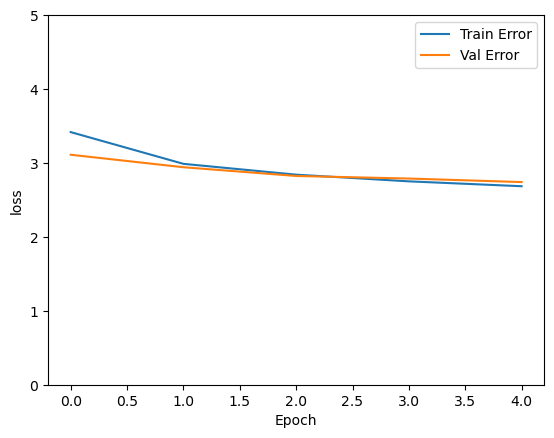

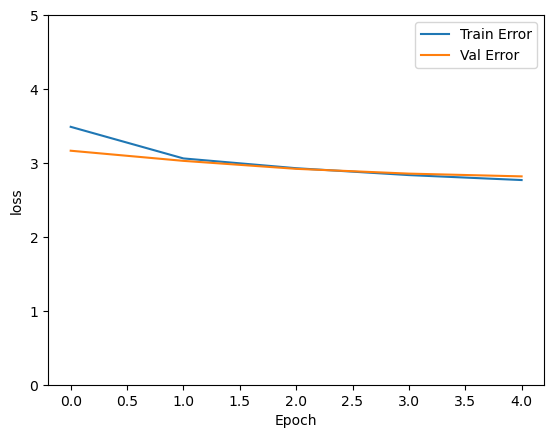

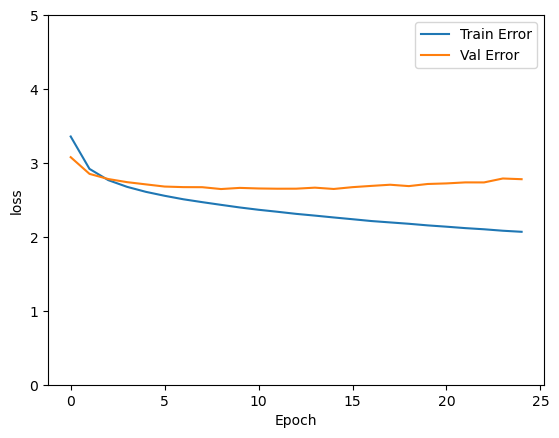

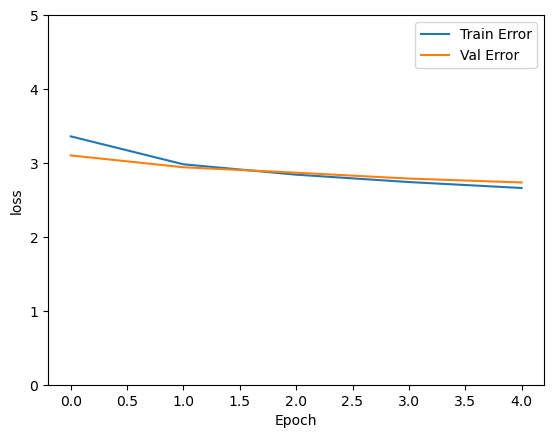

In [859]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.show()

plot_history(hist)
plot_history(hist2)
plot_history(hist3)
plot_history(hist4)

### Evaluate accuracy

In [860]:
test_loss, test_acc = model3.evaluate(normed_test_data, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

570/570 - 0s - loss: 2.7909 - accuracy: 0.2999 - 448ms/epoch - 786us/step

Test accuracy: 0.2999451756477356


In [861]:
predictions = model3.predict(normed_test_data)

570/570 [==============================] - 0s 740us/step


In [862]:
normed_test_data[0:3]

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2,-0.463406,0.644407,-0.117160,0.897663,0.638134,0.753965,-0.492611,-0.782967,1.079500,-0.735623,-0.854503,1.361786
10,0.254251,-0.225841,-0.848310,-0.323043,0.146412,0.753965,-0.442090,0.163288,-0.501991,0.273658,-0.171805,2.576236
13,-0.149431,-0.330296,-0.370472,-1.503988,-1.389082,0.753965,-0.519301,1.890866,2.547796,-0.677649,-1.244066,0.726923


In [863]:
np.argmax(predictions[0])

58

### Save the Model

In [864]:
model3.save('model')

INFO:tensorflow:Assets written to: model\assets


In [865]:
modelLoaded = keras.models.load_model('model')

## Kaggle

In [866]:
kaggle = pd.read_csv(r'Dataset\kaggle-ds.csv')
kaggle

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,49,138923,False,0.956,0.529,10,-8.766,1,0.0567,0.1040,0.000029,0.1100,0.8020,129.925,4
1,39,308013,False,0.663,0.875,7,-3.532,1,0.0428,0.1070,0.000261,0.0667,0.7420,119.986,4
2,51,137368,False,0.667,0.446,5,-10.801,0,0.3800,0.8920,0.000000,0.1010,0.3110,76.530,4
3,0,118840,False,0.602,0.553,11,-9.336,1,0.0328,0.1080,0.000000,0.0512,0.9710,130.594,4
4,0,164364,False,0.545,0.217,11,-14.524,0,0.0788,0.9950,0.338000,0.1230,0.7020,80.063,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795,20,204678,False,0.170,0.143,7,-16.568,1,0.0387,0.7730,0.272000,0.2150,0.0467,87.062,4
22796,41,484180,False,0.574,0.698,2,-7.458,1,0.0489,0.7530,0.000000,0.8950,0.8150,88.049,4
22797,50,348800,False,0.384,0.493,2,-8.718,1,0.0382,0.0164,0.000000,0.1010,0.0601,143.711,4
22798,0,253723,False,0.770,0.743,6,-3.251,1,0.0299,0.0205,0.000300,0.1440,0.8430,123.014,4


In [867]:
kaggle = kaggle.drop(['explicit','key','time_signature',],axis=1)

In [868]:
kaggle

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,49,138923,0.956,0.529,-8.766,1,0.0567,0.1040,0.000029,0.1100,0.8020,129.925
1,39,308013,0.663,0.875,-3.532,1,0.0428,0.1070,0.000261,0.0667,0.7420,119.986
2,51,137368,0.667,0.446,-10.801,0,0.3800,0.8920,0.000000,0.1010,0.3110,76.530
3,0,118840,0.602,0.553,-9.336,1,0.0328,0.1080,0.000000,0.0512,0.9710,130.594
4,0,164364,0.545,0.217,-14.524,0,0.0788,0.9950,0.338000,0.1230,0.7020,80.063
...,...,...,...,...,...,...,...,...,...,...,...,...
22795,20,204678,0.170,0.143,-16.568,1,0.0387,0.7730,0.272000,0.2150,0.0467,87.062
22796,41,484180,0.574,0.698,-7.458,1,0.0489,0.7530,0.000000,0.8950,0.8150,88.049
22797,50,348800,0.384,0.493,-8.718,1,0.0382,0.0164,0.000000,0.1010,0.0601,143.711
22798,0,253723,0.770,0.743,-3.251,1,0.0299,0.0205,0.000300,0.1440,0.8430,123.014


In [869]:
kaggle_stats = kaggle.describe()
kaggle_stats = kaggle_stats.transpose()
kaggle_stats

,count,mean,std,min,25%,50%,75%,max
popularity,22800.0,33.092851,22.234100,0.00000,17.0000,34.00000,50.00000,100.000
duration_ms,22800.0,229048.064605,107621.121067,17826.00000,174652.7500,213333.00000,263253.50000,5237295.000
danceability,22800.0,0.565967,0.172171,0.00000,0.4550,0.57900,0.69200,0.979
energy,22800.0,0.640526,0.252673,0.00002,0.4690,0.68500,0.85400,1.000
loudness,22800.0,-8.272129,5.003401,-43.95700,-10.0540,-7.03450,-5.03175,1.821
mode,22800.0,0.639342,0.480202,0.00000,0.0000,1.00000,1.00000,1.000
speechiness,22800.0,0.084330,0.106011,0.00000,0.0358,0.04870,0.08400,0.963
acousticness,22800.0,0.316326,0.333990,0.00000,0.0165,0.16950,0.60200,0.996
instrumentalness,22800.0,0.158800,0.311132,0.00000,0.0000,0.00005,0.05710,1.000
liveness,22800.0,0.213105,0.190632,0.00925,0.0976,0.13100,0.27200,0.989


In [870]:
normed_kaggle = norm(kaggle,kaggle_stats)
normed_kaggle

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.715439,-0.837429,2.265379,-0.441387,-0.098707,0.751055,-0.260630,-0.635724,-0.510298,-0.540858,1.270264,0.251403
1,0.265680,0.733731,0.563584,0.927973,0.947381,0.751055,-0.391749,-0.626742,-0.509554,-0.767997,1.038668,-0.080473
2,0.805391,-0.851878,0.586817,-0.769875,-0.505430,-1.331403,2.789061,1.723625,-0.510393,-0.588070,-0.624965,-1.531527
3,-1.488383,-1.024038,0.209285,-0.346402,-0.212630,0.751055,-0.486079,-0.623748,-0.510393,-0.849306,1.922594,0.273742
4,-1.488383,-0.601035,-0.121781,-1.676185,-1.249524,-1.331403,-0.052161,2.032017,0.575962,-0.472664,0.884271,-1.413556
...,...,...,...,...,...,...,...,...,...,...,...,...
22795,-0.588864,-0.226443,-2.299846,-1.969054,-1.658046,0.751055,-0.430425,1.367328,0.363834,0.009940,-1.645146,-1.179850
22796,0.355632,2.370649,0.046656,0.227462,0.162715,0.751055,-0.334208,1.307446,-0.510393,3.577018,1.320444,-1.146893
22797,0.760415,1.112718,-1.056897,-0.583864,-0.089114,0.751055,-0.435141,-0.898007,-0.510393,-0.588070,-1.593423,0.711736
22798,-1.488383,0.229276,1.185058,0.405558,1.003543,0.751055,-0.513435,-0.885732,-0.509428,-0.362505,1.428522,0.020636


In [871]:
predictions = model3.predict(normed_kaggle)

713/713 [==============================] - 1s 792us/step


In [872]:
predictions

array([[4.31898485e-07, 5.86291571e-11, 1.48820509e-05, ...,
        4.20958968e-04, 1.75274308e-05, 7.33699157e-10],
       [1.94741673e-07, 2.13622116e-06, 4.12358977e-02, ...,
        2.23497234e-04, 2.09537847e-03, 1.06880634e-07],
       [4.08992173e-06, 7.11154209e-15, 7.38767412e-05, ...,
        4.90389903e-05, 3.66415334e-05, 3.43310649e-06],
       ...,
       [3.22778535e-04, 2.85708607e-04, 9.41109611e-04, ...,
        4.31038253e-03, 3.32657364e-05, 1.79242415e-04],
       [4.81487289e-02, 3.55223659e-15, 8.94406810e-03, ...,
        6.07958600e-06, 2.62797221e-06, 6.53974075e-06],
       [1.86107820e-04, 1.49296265e-14, 5.87754926e-07, ...,
        6.56235954e-07, 4.25283943e-05, 2.75826133e-05]], dtype=float32)

In [873]:
kaggle_id = []
kaggle_labels = []
count = 0
for prediction in predictions:
    count += 1 
    kaggle_id.append(count)
    kaggle_labels.append(label_dict[np.argmax(prediction)])

In [874]:
kaggle_prediction = pd.DataFrame(columns=['id', 'track_genre'])

In [875]:
kaggle_prediction["id"] = kaggle_id
kaggle_prediction["track_genre"] = kaggle_labels
kaggle_prediction

,id,track_genre
0,1,children
1,2,j-idol
2,3,emo
3,4,rock
4,5,romance
...,...,...
22795,22796,disney
22796,22797,pagode
22797,22798,world-music
22798,22799,latin


In [877]:
kaggle_prediction.columns

Index(['id', 'track_genre'], dtype='object')

In [878]:
kaggle_prediction.to_csv('kaggle_prediction.csv', index=False)